In [204]:
import os
import pandas as pd
import nbformat

In [205]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/'

In [206]:
df=pd.read_csv('blockdesignscore.csv')

In [207]:
action_wais_df=pd.read_csv('Action_Wais.csv')

In [208]:
# Strip trailing spaces from column names in action_wais_df
action_wais_df.columns = action_wais_df.columns.str.strip()

# Rename 'Q1' to 'Participant' in wais_selected_df
wais_selected_df = df[['Q1', 'Block Design raw']].rename(columns={'Q1': 'Participant', 'Block Design raw': 'Block Design Raw Score'})

A_Wais_Score= pd.merge(action_wais_df, wais_selected_df, on='Participant', how='inner')

A_Wais_Score.head(20)


,Participant,Block Design Raw Score
0,C002,28
1,C004,30
2,C005,46
3,C010,54
4,C011,34
5,C014,32
6,C015,33
7,C018,50
8,C019,40
9,C022,32


In [209]:
A_Wais_Score.to_csv('A_BDScore.csv')

#### Extracting features and merging all participants - Total Actions, Time Spent, Total Missed Interactions

In [210]:
# List to store the dataframes
dfs = []

# Function to execute cells and extract totals_df
def extract_totals_df(nb):
    exec_env = {}
    totals_df = None
    plot_keywords = ['plt.', 'plotly.', 'seaborn.']
    # Execute all cells to set up the environment
    for cell in nb.cells:
        if cell.cell_type == 'code':
            if any(keyword in cell.source for keyword in plot_keywords):
                continue  # Skip cells that generate plots
            try:
                exec(cell.source, exec_env)
            except Exception as e:
                print(f"Error executing cell: {cell.source}\n{e}")

    # Extract totals_df
    totals_df = exec_env.get('totals_df')
    return totals_df

# Process each notebook file
for filename in os.listdir(directory):
     if filename.endswith("_ActionSteps.ipynb"):
        filepath = os.path.join(directory, filename)
        print(f"Processing file: {filepath}")
        
        with open(filepath) as f:
            nb = nbformat.read(f, as_version=4)
        
        totals_df = extract_totals_df(nb)
        
        if totals_df is not None:
            print(f"Extracted totals_df from {filename}")
            dfs.append(totals_df)
        else:
            print(f"No totals_df found in {filename}")


combined_df = pd.concat(dfs)
merged_df = pd.read_csv('A_BDScore.csv')
final_df = pd.merge(merged_df, combined_df, on='Participant', how='left')
final_df = final_df.drop(columns=[col for col in final_df.columns if 'Unnamed' in col])


Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C002B_ActionSteps.ipynb
Extracted totals_df from C002B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C004B_ActionSteps.ipynb
Extracted totals_df from C004B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C005C_ActionSteps.ipynb
Extracted totals_df from C005C_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C010B_ActionSteps.ipynb
Extracted totals_df from C010B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C011C_ActionSteps.ipynb
Extracted totals_df from C011C_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C014B_ActionSteps.ipynb
Extracted totals_df from C014B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D 

In [211]:
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions
0,C002,28,231.0,441.284316,30.0
1,C004,30,106.0,267.087071,10.0
2,C005,46,224.0,420.203874,24.0
3,C010,54,189.0,391.381875,29.0
4,C011,34,57.0,81.902667,4.0
5,C014,32,252.0,373.759417,12.0
6,C015,33,148.0,179.116540,7.0
7,C018,50,225.0,460.775250,37.0
8,C019,40,149.0,251.291784,14.0
9,C022,32,NaN,NaN,NaN


In [212]:
final_df = final_df.drop([4,9])

In [213]:
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions
0,C002,28,231.0,441.284316,30.0
1,C004,30,106.0,267.087071,10.0
2,C005,46,224.0,420.203874,24.0
3,C010,54,189.0,391.381875,29.0
5,C014,32,252.0,373.759417,12.0
6,C015,33,148.0,179.116540,7.0
7,C018,50,225.0,460.775250,37.0
8,C019,40,149.0,251.291784,14.0
10,C023,52,179.0,332.910903,17.0
11,C026,33,269.0,615.561959,18.0


#### Scatter Plot between Block Design Score and Total Actions

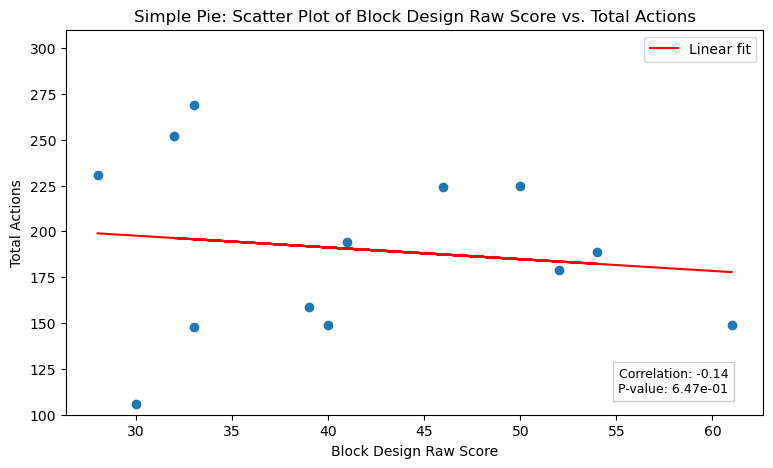

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Total Actions'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Total Actions'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Total Actions'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Total Actions')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Total Actions')
plt.ylim(100,310)
plt.legend()
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone/'
folder_path = os.path.join(directory, 'Plots/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '1 SP_TotalActions.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Scatter Plot between Block Design Score and Total Missed Interactions

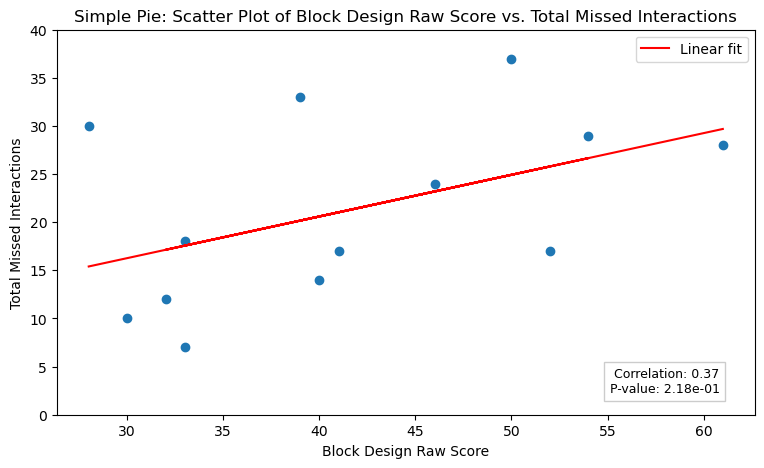

In [215]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Total Missed Interactions'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Total Missed Interactions'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Total Missed Interactions'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Total Missed Interactions')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Total Missed Interactions')
plt.ylim(0,40)
plt.legend()
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone/'
folder_path = os.path.join(directory, 'Plots/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '2 SP_TotalMissedInteractions.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Scatter Plot between Block Design Score and Total Time Spent

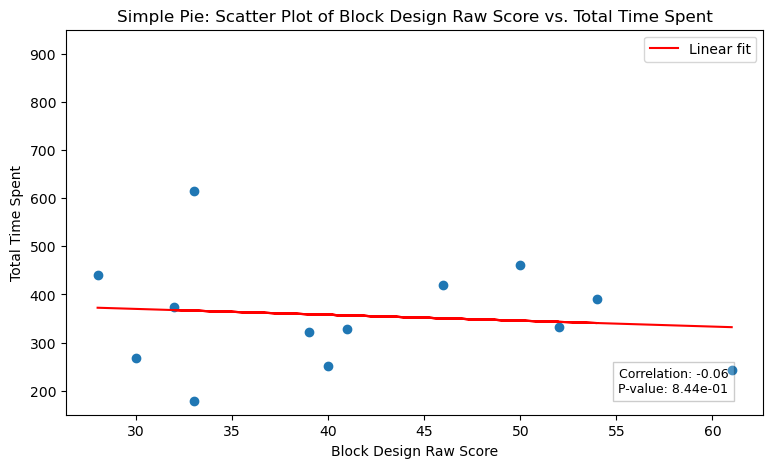

In [216]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Total Time Spent'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Total Time Spent'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Total Time Spent'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Total Time Spent')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Total Time Spent')
plt.ylim(150,950)
plt.legend()

file_path = os.path.join(folder_path, '3 SP_TotalTimeSpent.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

In [217]:
Int_ob=pd.read_csv('InteractedObjects_SimplePie.csv')
Int_ob

,Unnamed: 0,C002,C004,C005,C010,C011,C014,C015,C018,C019,C023,C026,C027,C030,C031,Mean,Median,Std Dev,IQR
0,newmeasuringcupsimple2,38,10,14,4,2,16,2,6,6,14,76,12,2,2,14,10,18,10
1,piebowlsimple,28,8,22,30,0,12,16,34,26,24,20,10,16,2,19,19,8,13
2,knife,20,4,6,8,4,24,14,2,6,6,18,24,14,12,11,11,7,8
3,applepiecookbook,15,9,16,7,5,7,7,34,7,7,7,7,9,9,10,7,7,2
4,butter,9,4,4,3,3,2,3,4,4,3,4,3,7,4,4,4,1,1
5,waterpitchersimple,8,4,2,2,0,6,4,2,2,4,2,4,2,4,3,3,1,2
6,butterholdersimple,6,2,10,2,4,8,2,2,2,2,2,4,2,2,3,2,2,2
7,stirspoonpiesimple,6,2,40,12,0,16,6,4,4,6,8,14,2,2,9,6,9,6
8,apple,44,28,54,66,27,70,69,70,57,58,69,83,42,62,57,58,15,25
9,pillsberrydoughboysimple,5,1,1,2,0,1,1,3,2,1,1,1,1,2,1,1,1,1


In [218]:
total_interactions = Int_ob.iloc[-1, 1:-4].astype(int)

# Create a DataFrame for total interactions
total_interactions_df = pd.DataFrame(total_interactions).reset_index()
total_interactions_df.columns = ['Participant', 'Total Object Interactions']

# Ensure participant column format matches final_df
total_interactions_df['Participant'] = total_interactions_df['Participant'].str.upper()
total_interactions_df


,Participant,Total Object Interactions
0,C002,201
1,C004,96
2,C005,200
3,C010,160
4,C011,53
5,C014,240
6,C015,141
7,C018,188
8,C019,135
9,C023,162


In [219]:
final_df= pd.merge(final_df, total_interactions_df, on='Participant', how='left')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions
0,C002,28,231.0,441.284316,30.0,201
1,C004,30,106.0,267.087071,10.0,96
2,C005,46,224.0,420.203874,24.0,200
3,C010,54,189.0,391.381875,29.0,160
4,C014,32,252.0,373.759417,12.0,240
5,C015,33,148.0,179.116540,7.0,141
6,C018,50,225.0,460.775250,37.0,188
7,C019,40,149.0,251.291784,14.0,135
8,C023,52,179.0,332.910903,17.0,162
9,C026,33,269.0,615.561959,18.0,251


#### Scatter Plot between Block Design Score and Total Object Interactions

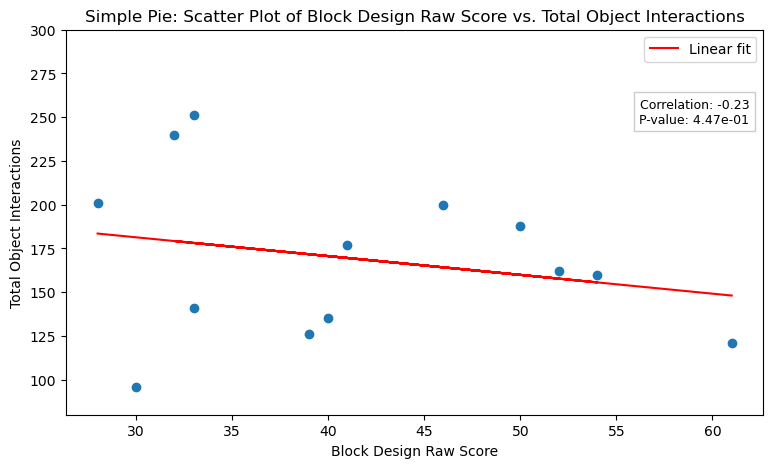

In [220]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Total Object Interactions'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Total Object Interactions'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Total Object Interactions'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.98, 0.75, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Total Object Interactions')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Total Object Interactions')
plt.ylim(80,300)
plt.legend()

file_path = os.path.join(folder_path, '4 SP_TotalObjectInteractions.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Block Design Score and Time Variability among Participants

In [221]:
time_variability=pd.read_csv('TimeVariability_SimplePie.csv')

In [222]:
time_variability = time_variability[['Participant', 'Time Spent S.D']]
final_df=pd.merge(final_df, time_variability, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D
0,C002,28,231.0,441.284316,30.0,201,50.340261
1,C004,30,106.0,267.087071,10.0,96,29.587162
2,C005,46,224.0,420.203874,24.0,200,42.595820
3,C010,54,189.0,391.381875,29.0,160,32.157613
4,C014,32,252.0,373.759417,12.0,240,31.466625
5,C015,33,148.0,179.116540,7.0,141,16.728146
6,C018,50,225.0,460.775250,37.0,188,62.982422
7,C019,40,149.0,251.291784,14.0,135,23.819270
8,C023,52,179.0,332.910903,17.0,162,30.494925
9,C026,33,269.0,615.561959,18.0,251,61.220314


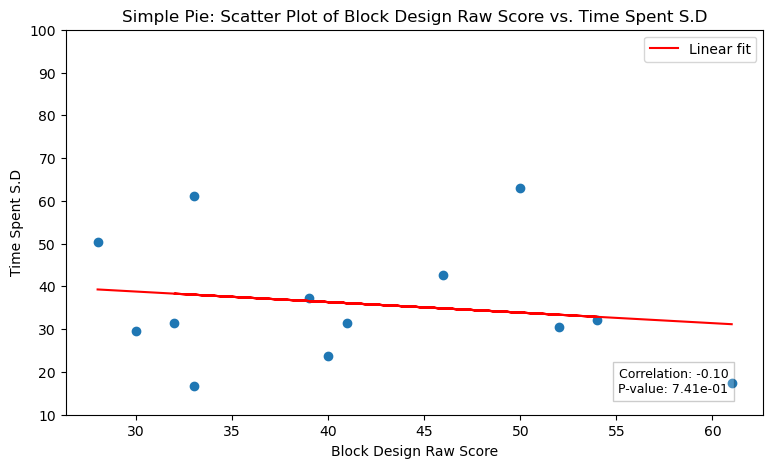

In [223]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Time Spent S.D'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Time Spent S.D'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Time Spent S.D'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Time Spent S.D')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Time Spent S.D')
plt.ylim(10,100)
plt.legend()
file_path = os.path.join(folder_path, '5 SP_TimeVariability.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Block Design Score and Action Count Variability

In [224]:
action_variability=pd.read_csv('ActionCountVariability_SimplePie.csv')

In [225]:
action_variability = action_variability[['Participant', 'Action Count S.D']]
final_df=pd.merge(final_df, action_variability, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D
0,C002,28,231.0,441.284316,30.0,201,50.340261,24.617067
1,C004,30,106.0,267.087071,10.0,96,29.587162,11.430422
2,C005,46,224.0,420.203874,24.0,200,42.595820,26.613052
3,C010,54,189.0,391.381875,29.0,160,32.157613,22.471396
4,C014,32,252.0,373.759417,12.0,240,31.466625,37.179173
5,C015,33,148.0,179.116540,7.0,141,16.728146,25.625626
6,C018,50,225.0,460.775250,37.0,188,62.982422,28.409025
7,C019,40,149.0,251.291784,14.0,135,23.819270,14.073831
8,C023,52,179.0,332.910903,17.0,162,30.494925,20.847498
9,C026,33,269.0,615.561959,18.0,251,61.220314,28.549479


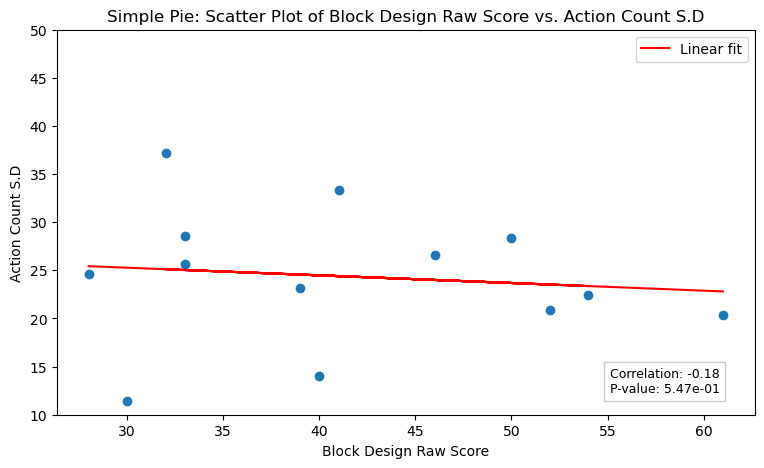

In [226]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Action Count S.D'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Action Count S.D'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Action Count S.D'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Action Count S.D')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count S.D')
plt.ylim(10,50)
plt.legend()
file_path = os.path.join(folder_path, '6 SP_ActionVariability.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Block Design Score and Total Completed Steps

In [227]:
totalsteps=pd.read_csv('TotalCompletedSteps_SimplePie.csv')

In [228]:
totalsteps = totalsteps[['Participant', 'Total Completed Steps']]
final_df=pd.merge(final_df, totalsteps, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps
0,C002,28,231.0,441.284316,30.0,201,50.340261,24.617067,18
1,C004,30,106.0,267.087071,10.0,96,29.587162,11.430422,18
2,C005,46,224.0,420.203874,24.0,200,42.595820,26.613052,18
3,C010,54,189.0,391.381875,29.0,160,32.157613,22.471396,18
4,C014,32,252.0,373.759417,12.0,240,31.466625,37.179173,26
5,C015,33,148.0,179.116540,7.0,141,16.728146,25.625626,26
6,C018,50,225.0,460.775250,37.0,188,62.982422,28.409025,26
7,C019,40,149.0,251.291784,14.0,135,23.819270,14.073831,18
8,C023,52,179.0,332.910903,17.0,162,30.494925,20.847498,26
9,C026,33,269.0,615.561959,18.0,251,61.220314,28.549479,18


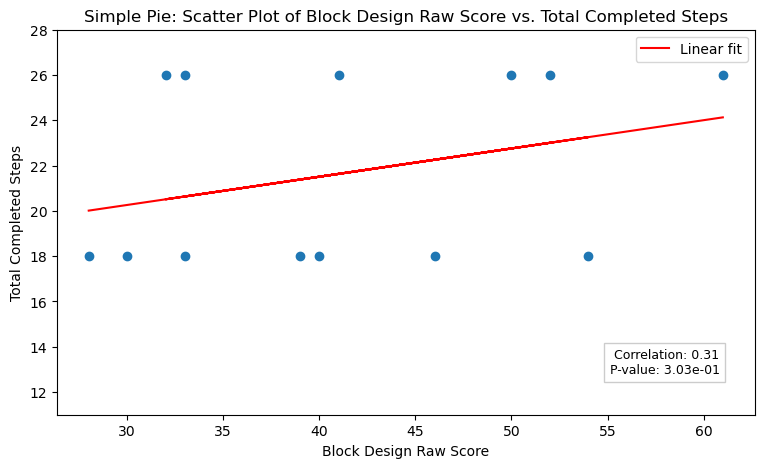

In [229]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Total Completed Steps'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Total Completed Steps'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Total Completed Steps'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.1, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Total Completed Steps')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Total Completed Steps')
plt.ylim(11,28)
plt.legend()
file_path = os.path.join(folder_path, '7 SP_TotalCompletedSteps.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Block design score and count of object interactions under every step

In [230]:
IntOb = pd.read_csv('InteractedObjects_PerStep.csv')

In [231]:
filtered_apples = IntOb[IntOb['Completed Step'] == 'Add apples to pan']

In [232]:
IntOb_Step = filtered_apples[['Participant', 'Apple']]
final_df=pd.merge(final_df, IntOb_Step, on ='Participant', how= 'inner')

In [233]:
final_df.rename(columns={'Apple': 'Apple Interactions - Add Apples'}, inplace=True)
final_df


,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Apple Interactions - Add Apples
0,C002,28,231.0,441.284316,30.0,201,50.340261,24.617067,18,42.0
1,C004,30,106.0,267.087071,10.0,96,29.587162,11.430422,18,28.0
2,C005,46,224.0,420.203874,24.0,200,42.595820,26.613052,18,52.0
3,C010,54,189.0,391.381875,29.0,160,32.157613,22.471396,18,66.0
4,C014,32,252.0,373.759417,12.0,240,31.466625,37.179173,26,70.0
5,C015,33,148.0,179.116540,7.0,141,16.728146,25.625626,26,65.0
6,C018,50,225.0,460.775250,37.0,188,62.982422,28.409025,26,70.0
7,C019,40,149.0,251.291784,14.0,135,23.819270,14.073831,18,39.0
8,C023,52,179.0,332.910903,17.0,162,30.494925,20.847498,26,58.0
9,C026,33,269.0,615.561959,18.0,251,61.220314,28.549479,18,39.0


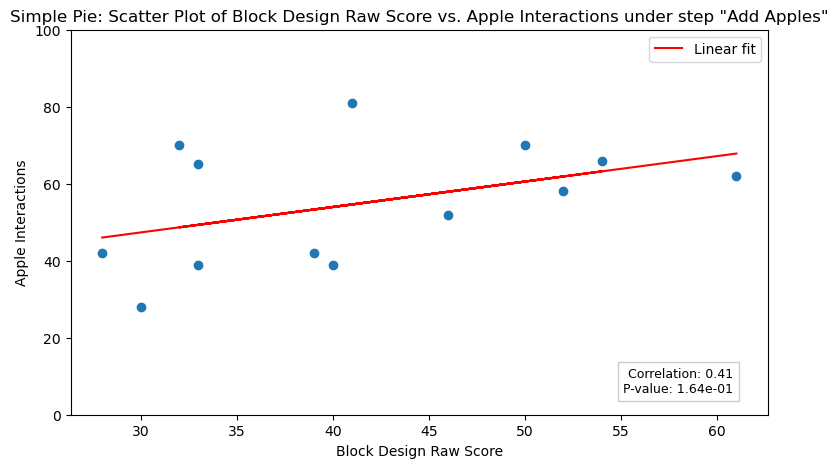

In [234]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Apple Interactions - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Apple Interactions - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Apple Interactions - Add Apples'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Apple Interactions under step "Add Apples"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Apple Interactions')
plt.ylim(0,100)
plt.legend()
file_path = os.path.join(folder_path, '8 SP_CountAppleInteractions.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Block design score and Action Count under every step

In [235]:
actionstep=pd.read_csv('ActionCountVariability_SimplePie.csv')

In [236]:
Action_step = actionstep[['Participant', 'Add Sugar ','Add apples to pan', 'Add cinnamon' ,'Stir bowl','Put pie in oven','Add butter','Add crust top','Add water']]
final_df=pd.merge(final_df, Action_step, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Apple Interactions - Add Apples,Add Sugar,Add apples to pan,Add cinnamon,Stir bowl,Put pie in oven,Add butter,Add crust top,Add water
0,C002,28,231.0,441.284316,30.0,201,50.340261,24.617067,18,42.0,70,68,7,7,12,8,23,22
1,C004,30,106.0,267.087071,10.0,96,29.587162,11.430422,18,28.0,28,36,2,6,7,9,5,2
2,C005,46,224.0,420.203874,24.0,200,42.595820,26.613052,18,52.0,19,85,52,4,33,7,3,3
3,C010,54,189.0,391.381875,29.0,160,32.157613,22.471396,18,66.0,22,81,5,6,15,2,22,8
4,C014,32,252.0,373.759417,12.0,240,31.466625,37.179173,26,70.0,9,127,8,3,10,16,4,8
5,C015,33,148.0,179.116540,7.0,141,16.728146,25.625626,26,65.0,8,90,2,14,7,7,4,6
6,C018,50,225.0,460.775250,37.0,188,62.982422,28.409025,26,70.0,46,98,3,12,7,7,6,9
7,C019,40,149.0,251.291784,14.0,135,23.819270,14.073831,18,39.0,8,48,29,7,7,10,21,1
8,C023,52,179.0,332.910903,17.0,162,30.494925,20.847498,26,58.0,16,76,5,14,25,8,4,4
9,C026,33,269.0,615.561959,18.0,251,61.220314,28.549479,18,39.0,92,57,47,16,13,12,6,2


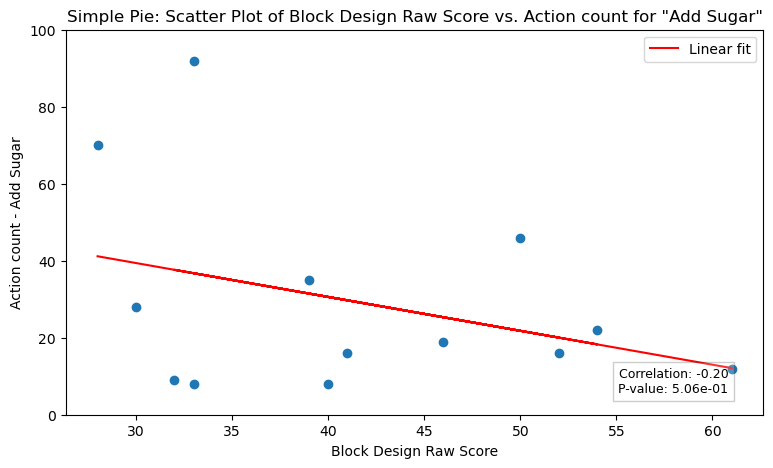

In [237]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add Sugar '])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add Sugar '])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add Sugar '], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Action count for "Add Sugar"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count - Add Sugar')
plt.ylim(0,100)
plt.legend()
file_path = os.path.join(folder_path, '9 SP_CountAddSugar.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

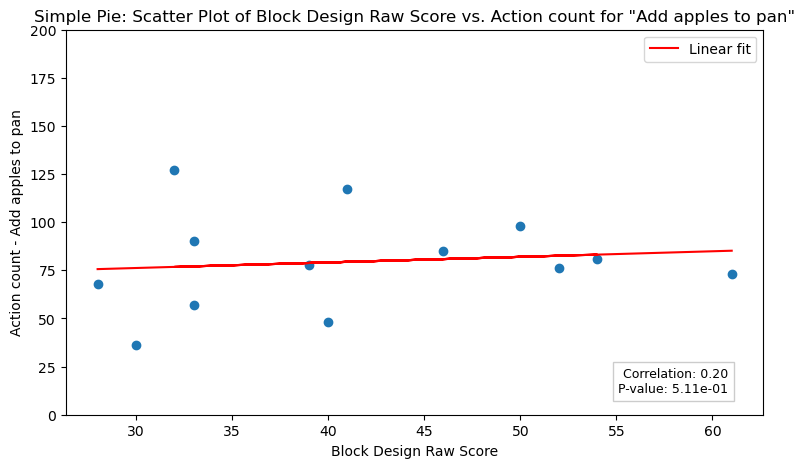

In [238]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add apples to pan'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add apples to pan'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add apples to pan'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Action count for "Add apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count - Add apples to pan')
plt.ylim(0,200)
plt.legend()
file_path = os.path.join(folder_path, '10 SP_CountAddApples.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

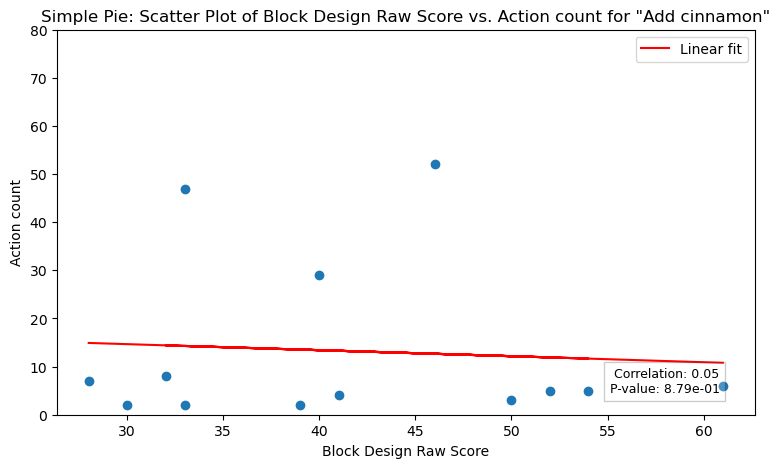

In [239]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add cinnamon'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Action count for "Add cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count')
plt.ylim(0,80)
plt.legend()
file_path = os.path.join(folder_path, '11 SP_CountAddCinnamon.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

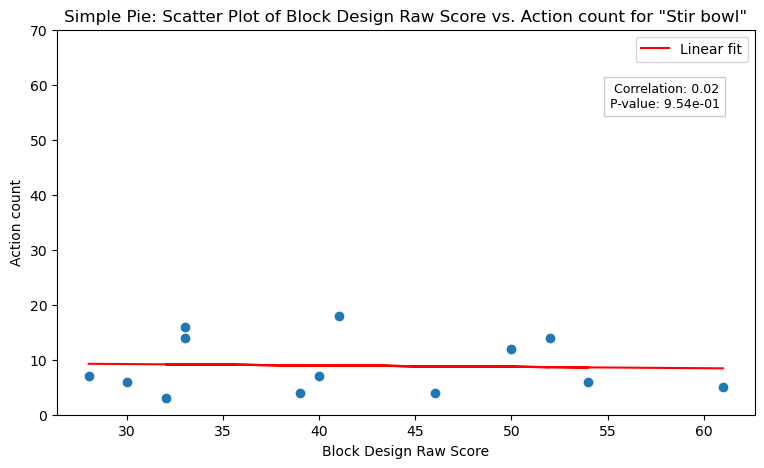

In [240]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Stir bowl'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Stir bowl'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Stir bowl'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.79, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Action count for "Stir bowl"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count')
plt.ylim(0,70)
plt.legend()
file_path = os.path.join(folder_path, '12 SP_CountStirBowl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

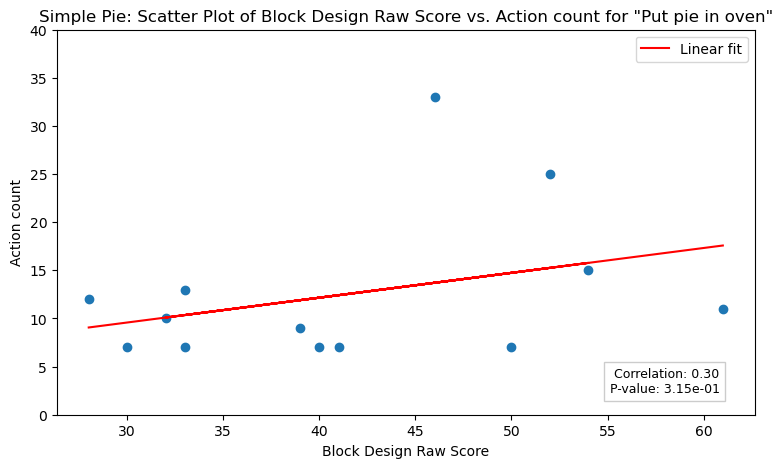

In [241]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Put pie in oven'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Put pie in oven'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Put pie in oven'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Action count for "Put pie in oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count')
plt.ylim(0,40)
plt.legend()
file_path = os.path.join(folder_path, '13 SP_CountPieinOven.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

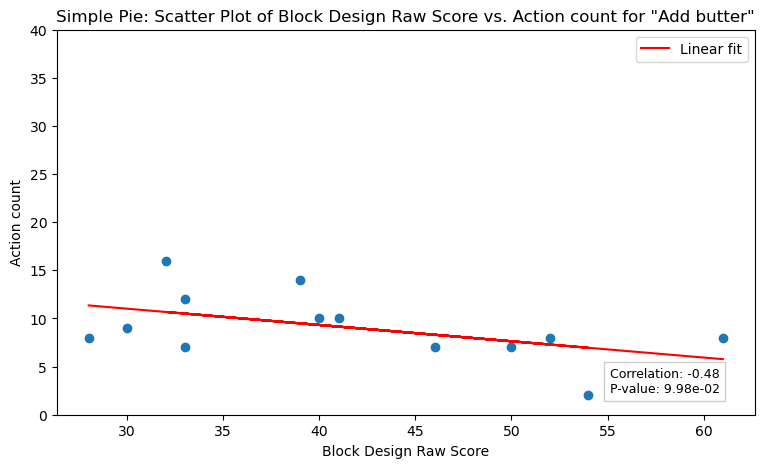

In [273]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add butter'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add butter'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add butter'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Action count for "Add butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count')
plt.ylim(0,40)
plt.legend()
file_path = os.path.join(folder_path, '14 SP_CountAddButter.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

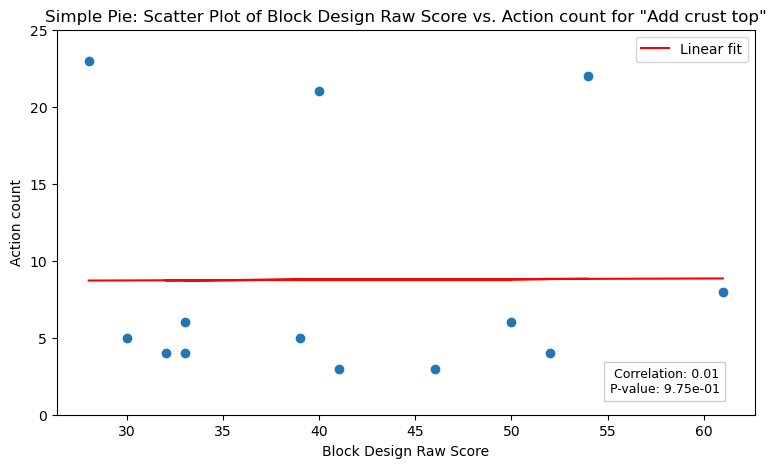

In [274]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add crust top'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add crust top'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add crust top'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Action count for "Add crust top"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count')
plt.ylim(0,25)
plt.legend()
file_path = os.path.join(folder_path, '15 SP_CountAddCrustTop.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

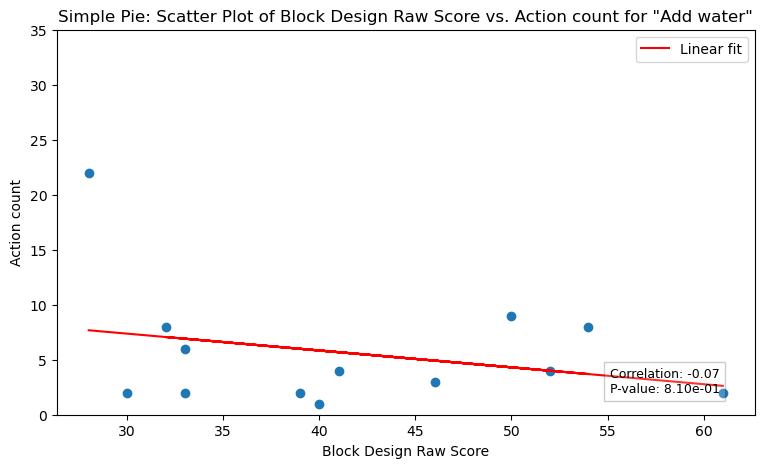

In [275]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add water'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add water'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add water'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Action count for "Add water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count')
plt.ylim(0,35)
plt.legend()
file_path = os.path.join(folder_path, '16 SP_CountAddWater.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Error to action Ratio

In [245]:
final_df['Error to Actions Ratio'] = final_df['Total Missed Interactions'] / final_df['Total Actions']

In [246]:
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Apple Interactions - Add Apples,Add Sugar,Add apples to pan,Add cinnamon,Stir bowl,Put pie in oven,Add butter,Add crust top,Add water,Error to Actions Ratio
0,C002,28,231.0,441.284316,30.0,201,50.340261,24.617067,18,42.0,70,68,7,7,12,8,23,22,0.129870
1,C004,30,106.0,267.087071,10.0,96,29.587162,11.430422,18,28.0,28,36,2,6,7,9,5,2,0.094340
2,C005,46,224.0,420.203874,24.0,200,42.595820,26.613052,18,52.0,19,85,52,4,33,7,3,3,0.107143
3,C010,54,189.0,391.381875,29.0,160,32.157613,22.471396,18,66.0,22,81,5,6,15,2,22,8,0.153439
4,C014,32,252.0,373.759417,12.0,240,31.466625,37.179173,26,70.0,9,127,8,3,10,16,4,8,0.047619
5,C015,33,148.0,179.116540,7.0,141,16.728146,25.625626,26,65.0,8,90,2,14,7,7,4,6,0.047297
6,C018,50,225.0,460.775250,37.0,188,62.982422,28.409025,26,70.0,46,98,3,12,7,7,6,9,0.164444
7,C019,40,149.0,251.291784,14.0,135,23.819270,14.073831,18,39.0,8,48,29,7,7,10,21,1,0.093960
8,C023,52,179.0,332.910903,17.0,162,30.494925,20.847498,26,58.0,16,76,5,14,25,8,4,4,0.094972
9,C026,33,269.0,615.561959,18.0,251,61.220314,28.549479,18,39.0,92,57,47,16,13,12,6,2,0.066914


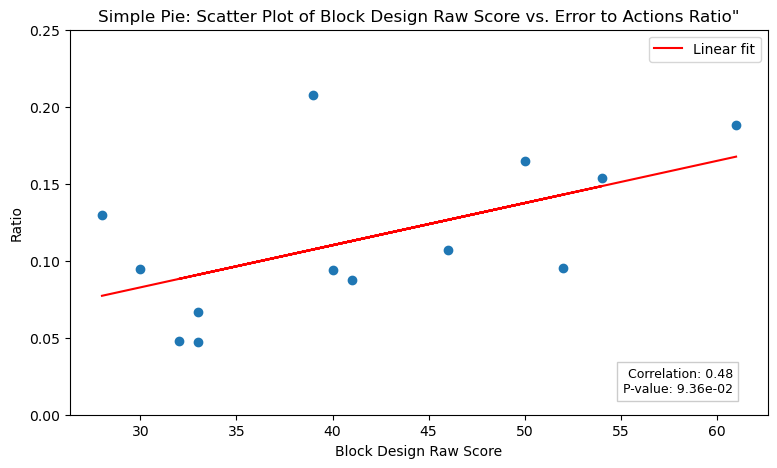

In [276]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Error to Actions Ratio'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Error to Actions Ratio'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Error to Actions Ratio'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Error to Actions Ratio"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Ratio')
plt.ylim(0,0.25)
plt.legend()
file_path = os.path.join(folder_path, '17 SP_ErrortoActions.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Action Type and Block Design Score

In [248]:
action_type=pd.read_csv('ActionType_SimplePie.csv')

In [249]:
action_type = action_type[['Participant', 'Chopped','Left Hand Grab','Left Hand Released','Right Hand Grab','Right Hand Released']]
final_df=pd.merge(final_df, action_type, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Apple Interactions - Add Apples,...,Put pie in oven,Add butter,Add crust top,Add water,Error to Actions Ratio,Chopped,Left Hand Grab,Left Hand Released,Right Hand Grab,Right Hand Released
0,C002,28,231.0,441.284316,30.0,201,50.340261,24.617067,18,42.0,...,12,8,23,22,0.129870,10,40,27,97,57
1,C004,30,106.0,267.087071,10.0,96,29.587162,11.430422,18,28.0,...,7,9,5,2,0.094340,8,38,25,23,12
2,C005,46,224.0,420.203874,24.0,200,42.595820,26.613052,18,52.0,...,33,7,3,3,0.107143,22,97,61,30,14
3,C010,54,189.0,391.381875,29.0,160,32.157613,22.471396,18,66.0,...,15,2,22,8,0.153439,14,35,23,74,43
4,C014,32,252.0,373.759417,12.0,240,31.466625,37.179173,26,70.0,...,10,16,4,8,0.047619,20,41,30,88,73
5,C015,33,148.0,179.116540,7.0,141,16.728146,25.625626,26,65.0,...,7,7,4,6,0.047297,21,13,11,61,42
6,C018,50,225.0,460.775250,37.0,188,62.982422,28.409025,26,70.0,...,7,7,6,9,0.164444,24,69,25,71,36
7,C019,40,149.0,251.291784,14.0,135,23.819270,14.073831,18,39.0,...,7,10,21,1,0.093960,15,39,33,41,21
8,C023,52,179.0,332.910903,17.0,162,30.494925,20.847498,26,58.0,...,25,8,4,4,0.094972,18,19,14,80,48
9,C026,33,269.0,615.561959,18.0,251,61.220314,28.549479,18,39.0,...,13,12,6,2,0.066914,16,2,2,141,108


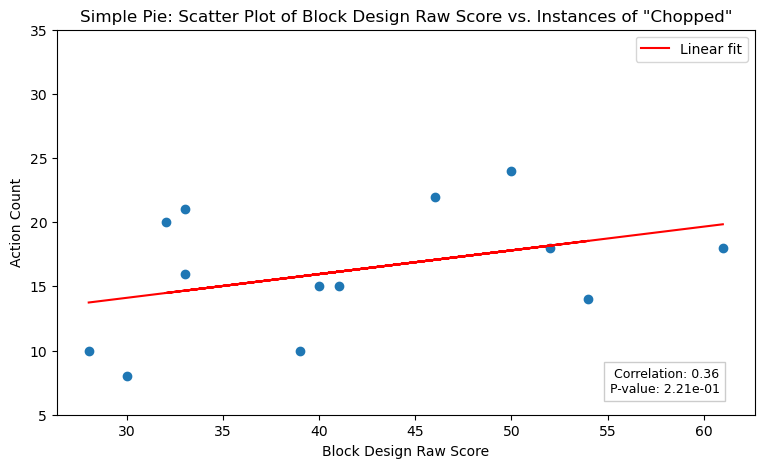

In [277]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Chopped'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Chopped'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Chopped'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Instances of "Chopped"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.ylim(5,35)
plt.legend()
file_path = os.path.join(folder_path, '18 SP_CountChopped.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

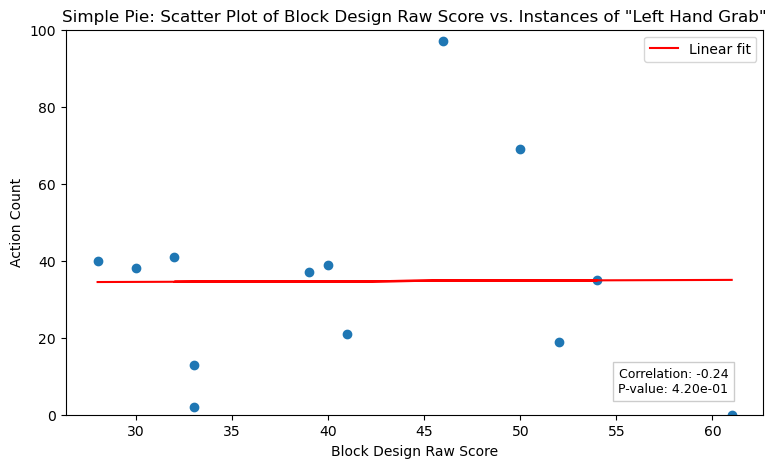

In [278]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Left Hand Grab'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Left Hand Grab'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Left Hand Grab'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Instances of "Left Hand Grab"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.ylim(0,100)
plt.legend()
file_path = os.path.join(folder_path, '19 SP_CountLeftHandGrab.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

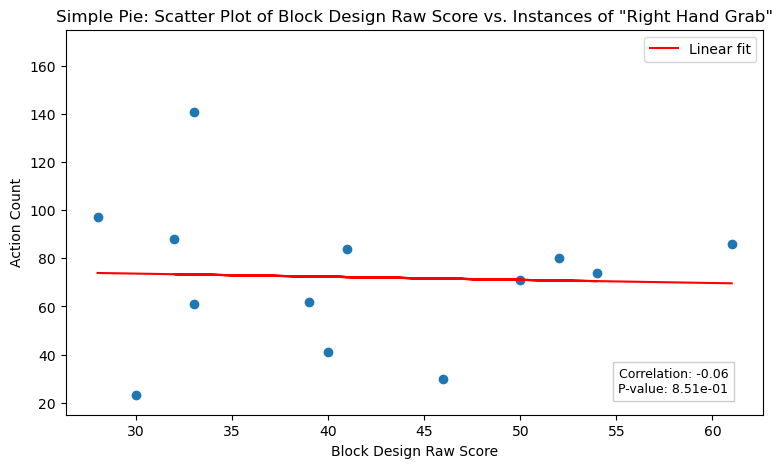

In [280]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Right Hand Grab'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Right Hand Grab'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Right Hand Grab'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Instances of "Right Hand Grab"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.ylim(15,175)
plt.legend()
file_path = os.path.join(folder_path, '20 SP_CountRightHandGrab.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

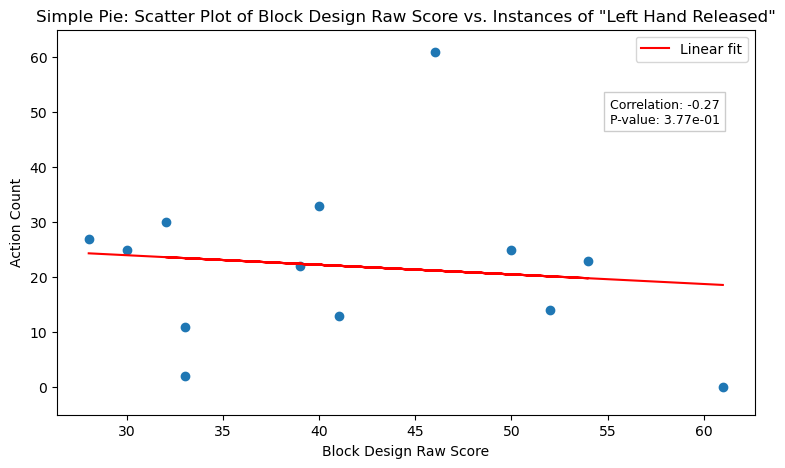

In [284]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Left Hand Released'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Left Hand Released'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Left Hand Released'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.75, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Instances of "Left Hand Released"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.ylim(-5,65)
plt.legend()
file_path = os.path.join(folder_path, '21 SP_CountLeftHandReleased.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

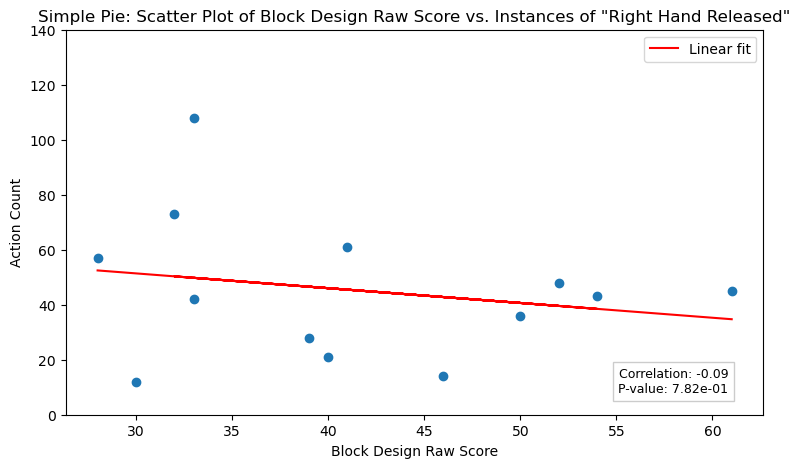

In [285]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Right Hand Released'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Right Hand Released'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Right Hand Released'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Instances of "Right Hand Released"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.ylim(0,140)
plt.legend()
file_path = os.path.join(folder_path, '22 SP_CountRightHandReleased.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Missed action type & Block design score

In [255]:
actiontype_missed=pd.read_csv('ActionTypeMissed_SimplePie.csv')

In [256]:
actiontype_missed = actiontype_missed.rename(columns={
    'Left Hand Grab': 'Left Hand Grab - Missed',
    'Right Hand Grab': 'Right Hand Grab - Missed'
})

In [257]:
actiontype_missed = actiontype_missed[['Participant','Left Hand Grab - Missed','Right Hand Grab - Missed']]
final_df=pd.merge(final_df, actiontype_missed, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Apple Interactions - Add Apples,...,Add crust top,Add water,Error to Actions Ratio,Chopped,Left Hand Grab,Left Hand Released,Right Hand Grab,Right Hand Released,Left Hand Grab - Missed,Right Hand Grab - Missed
0,C002,28,231.0,441.284316,30.0,201,50.340261,24.617067,18,42.0,...,23,22,0.129870,10,40,27,97,57,6,24
1,C004,30,106.0,267.087071,10.0,96,29.587162,11.430422,18,28.0,...,5,2,0.094340,8,38,25,23,12,8,2
2,C005,46,224.0,420.203874,24.0,200,42.595820,26.613052,18,52.0,...,3,3,0.107143,22,97,61,30,14,15,9
3,C010,54,189.0,391.381875,29.0,160,32.157613,22.471396,18,66.0,...,22,8,0.153439,14,35,23,74,43,8,21
4,C014,32,252.0,373.759417,12.0,240,31.466625,37.179173,26,70.0,...,4,8,0.047619,20,41,30,88,73,6,6
5,C015,33,148.0,179.116540,7.0,141,16.728146,25.625626,26,65.0,...,4,6,0.047297,21,13,11,61,42,0,7
6,C018,50,225.0,460.775250,37.0,188,62.982422,28.409025,26,70.0,...,6,9,0.164444,24,69,25,71,36,12,25
7,C019,40,149.0,251.291784,14.0,135,23.819270,14.073831,18,39.0,...,21,1,0.093960,15,39,33,41,21,4,10
8,C023,52,179.0,332.910903,17.0,162,30.494925,20.847498,26,58.0,...,4,4,0.094972,18,19,14,80,48,3,14
9,C026,33,269.0,615.561959,18.0,251,61.220314,28.549479,18,39.0,...,6,2,0.066914,16,2,2,141,108,0,18


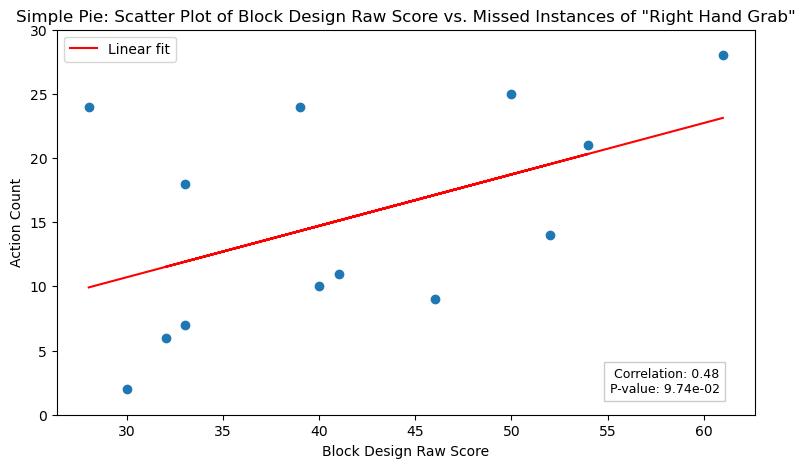

In [288]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Right Hand Grab - Missed'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Right Hand Grab - Missed'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Right Hand Grab - Missed'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Missed Instances of "Right Hand Grab"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.ylim(0,30)
plt.legend()
file_path = os.path.join(folder_path, '23 SP_MissedRightHandGrab.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

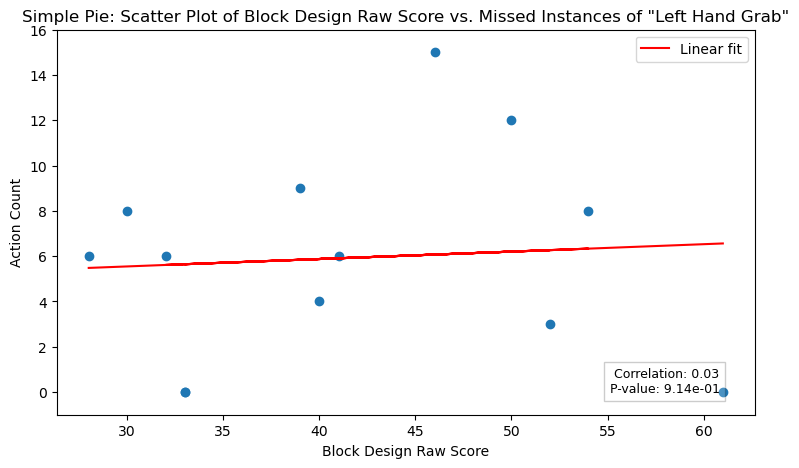

In [287]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Left Hand Grab - Missed'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Left Hand Grab - Missed'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Left Hand Grab - Missed'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Missed Instances of "Left Hand Grab"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.ylim(-1,16)
plt.legend()
file_path = os.path.join(folder_path, '24 SP_MissedLeftHandGrab.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Interacted objects per step & Block design score

In [260]:
IntOb = pd.read_csv('InteractedObjects_PerStep.csv')

In [261]:
Objects_Sugar = IntOb[IntOb['Completed Step'] == 'Add Sugar ']
Ob_Sugar = Objects_Sugar[['Participant', 'Interacted Objects']]
Ob_Sugar = Ob_Sugar.rename(columns={'Interacted Objects': 'Object Count - Add sugar'})
final_df=pd.merge(final_df, Ob_Sugar, on ='Participant', how= 'inner')

In [262]:
Objects_Sugar = IntOb[IntOb['Completed Step'] == 'Add apples to pan']
Ob_Sugar = Objects_Sugar[['Participant', 'Interacted Objects']]
Ob_Sugar = Ob_Sugar.rename(columns={'Interacted Objects': 'Object Count - Add apples'})
final_df=pd.merge(final_df, Ob_Sugar, on ='Participant', how= 'inner')


In [263]:
Objects_Sugar = IntOb[IntOb['Completed Step'] == 'Add cinnamon']
Ob_Sugar = Objects_Sugar[['Participant', 'Interacted Objects']]
Ob_Sugar = Ob_Sugar.rename(columns={'Interacted Objects': 'Object Count - Add cinnamon'})
final_df=pd.merge(final_df, Ob_Sugar, on ='Participant', how= 'inner')


In [264]:
Objects_Sugar = IntOb[IntOb['Completed Step'] == 'Stir bowl']
Ob_Sugar = Objects_Sugar[['Participant', 'Interacted Objects']]
Ob_Sugar = Ob_Sugar.rename(columns={'Interacted Objects': 'Object Count - Stir bowl'})
final_df=pd.merge(final_df, Ob_Sugar, on ='Participant', how= 'inner')

In [265]:
Objects_Sugar = IntOb[IntOb['Completed Step'] == 'Add bottom crust']
Ob_Sugar = Objects_Sugar[['Participant', 'Interacted Objects']]
Ob_Sugar = Ob_Sugar.rename(columns={'Interacted Objects': 'Object Count - Add bottom crust'})
final_df=pd.merge(final_df, Ob_Sugar, on ='Participant', how= 'inner')

In [266]:
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Apple Interactions - Add Apples,...,Left Hand Released,Right Hand Grab,Right Hand Released,Left Hand Grab - Missed,Right Hand Grab - Missed,Object Count - Add sugar,Object Count - Add apples,Object Count - Add cinnamon,Object Count - Stir bowl,Object Count - Add bottom crust
0,C002,28,231.0,441.284316,30.0,201,50.340261,24.617067,18,42.0,...,27,97,57,6,24,55,68,4,6,6
1,C004,30,106.0,267.087071,10.0,96,29.587162,11.430422,18,28.0,...,25,23,12,8,2,21,36,2,6,3
2,C005,46,224.0,420.203874,24.0,200,42.595820,26.613052,18,52.0,...,61,30,14,15,9,16,79,48,4,2
3,C010,54,189.0,391.381875,29.0,160,32.157613,22.471396,18,66.0,...,23,74,43,8,21,6,79,5,3,2
4,C014,32,252.0,373.759417,12.0,240,31.466625,37.179173,26,70.0,...,30,88,73,6,6,6,126,6,3,13
5,C015,33,148.0,179.116540,7.0,141,16.728146,25.625626,26,65.0,...,11,61,42,0,7,5,90,2,13,2
6,C018,50,225.0,460.775250,37.0,188,62.982422,28.409025,26,70.0,...,25,71,36,12,25,31,94,2,7,20
7,C019,40,149.0,251.291784,14.0,135,23.819270,14.073831,18,39.0,...,33,41,21,4,10,7,48,24,5,5
8,C023,52,179.0,332.910903,17.0,162,30.494925,20.847498,26,58.0,...,14,80,48,3,14,13,75,5,12,5
9,C026,33,269.0,615.561959,18.0,251,61.220314,28.549479,18,39.0,...,2,141,108,0,18,81,57,44,16,7


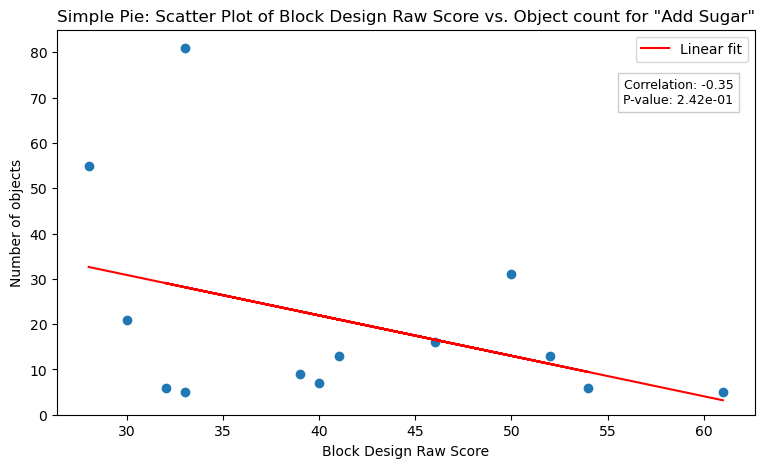

In [291]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Object Count - Add sugar'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Object Count - Add sugar'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Object Count - Add sugar'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.97, 0.80, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Object count for "Add Sugar"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Number of objects')
plt.ylim(0,85)
plt.legend()
file_path = os.path.join(folder_path, '25 SP_ObjectAddSugar.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

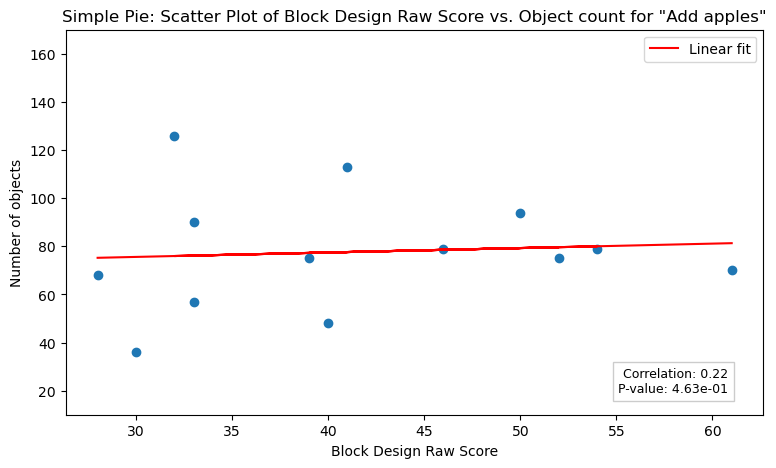

In [292]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Object Count - Add apples'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Object Count - Add apples'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Object Count - Add apples'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Object count for "Add apples"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Number of objects')
plt.ylim(10,170)
plt.legend()
file_path = os.path.join(folder_path, '26 SP_ObjectAddapples.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

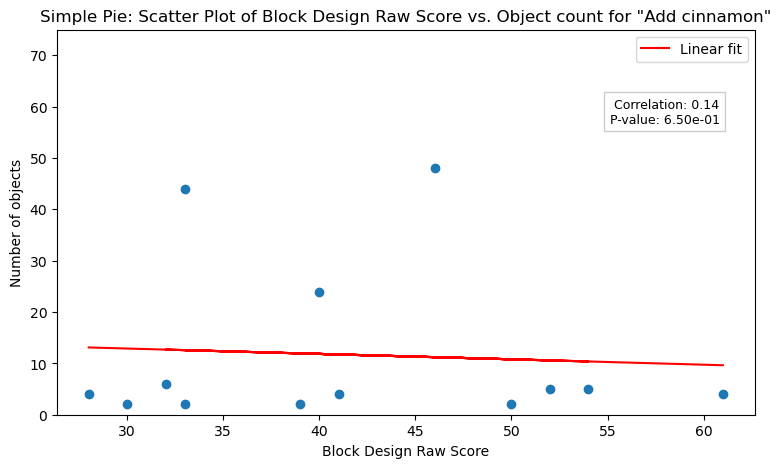

In [296]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Object Count - Add cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Object Count - Add cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Object Count - Add cinnamon'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.75, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Object count for "Add cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Number of objects')
plt.ylim(0,75)
plt.legend()
file_path = os.path.join(folder_path, '27 SP_ObjectAddCinnamon.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

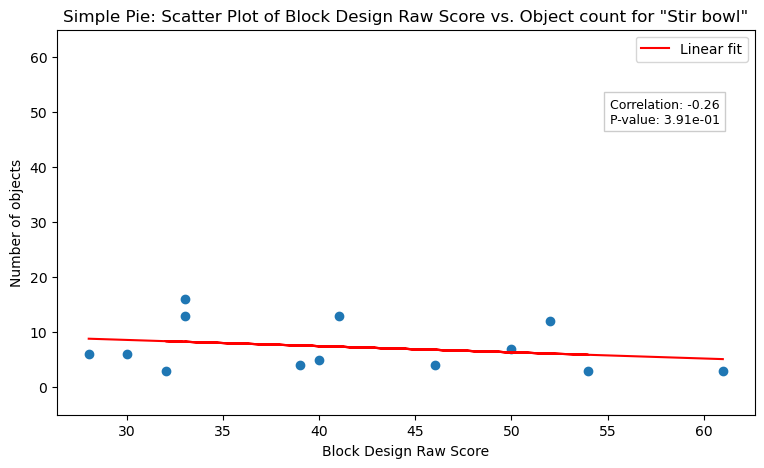

In [299]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Object Count - Stir bowl'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Object Count - Stir bowl'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Object Count - Stir bowl'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.75, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Object count for "Stir bowl"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Number of objects')
plt.ylim(-5,65)
plt.legend()
file_path = os.path.join(folder_path, '28 SP_ObjectStirBowl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

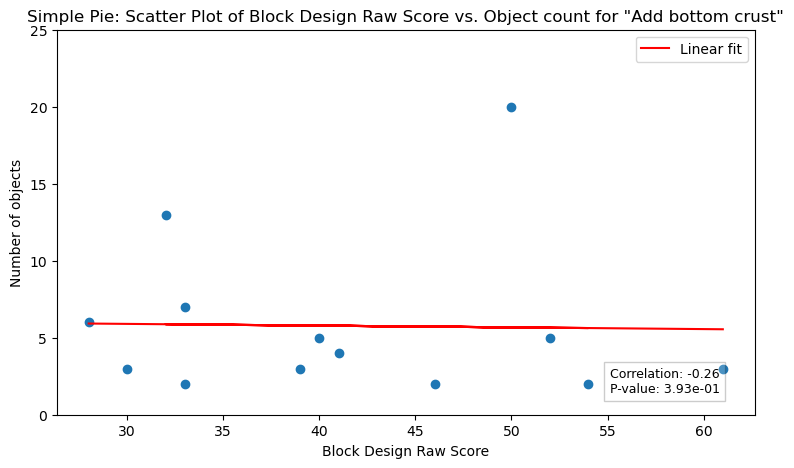

In [300]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Object Count - Add bottom crust'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Object Count - Add bottom crust'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Object Count - Add bottom crust'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Object count for "Add bottom crust"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Number of objects')
plt.ylim(0,25)
plt.legend()
file_path = os.path.join(folder_path, '29 SP_ObjectAddBottomCrust.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

In [272]:
#final_df.to_csv('Features_SimplePie.csv', index=False)